In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read(fpath):
    try:
        with open(fpath) as f:
            flines = f.readlines()
    except:
        return None
    len_flines = len(flines)
    n_vals = [flines[i] for i in range(0, len_flines,3)]
    try:
        int(n_vals[-1])
    except:
        n_vals = n_vals[:-1]
    n_vals = [int(num) for num in n_vals]
    avg_vecs = [flines[i] for i in range(1,len_flines,3)]
    max_vecs = [flines[i] for i in range(2,len_flines,3)]
    vec_len = len(avg_vecs[0].split(" ")) - 2
    for i,vec in enumerate(avg_vecs):
        vec = vec.split(" ")[1:vec_len+1]
        avg_vecs[i] = [float(j) for j in vec]
        avg_vecs[i] = sum([avg_vecs[i][j]*2**(-(j+1)) for j in range(vec_len)])
    
    for i,vec in enumerate(max_vecs):
        vec = vec.split(" ")[1:vec_len+1]
        max_vecs[i] = [int(j) for j in vec]
        max_vecs[i] = sum([max_vecs[i][j]*2**(-(j+1)) for j in range(vec_len)])
    
    return np.array(n_vals),np.array(max_vecs),np.array(avg_vecs)

In [25]:
data = [read(f"hill_climber_test_g_20_{i}.log") for i in range(10)]
# data = [tup for tup in data if tup is not None]
data2 = [read(f"GF_test_g_20_{i}.log") for i in range(10)]


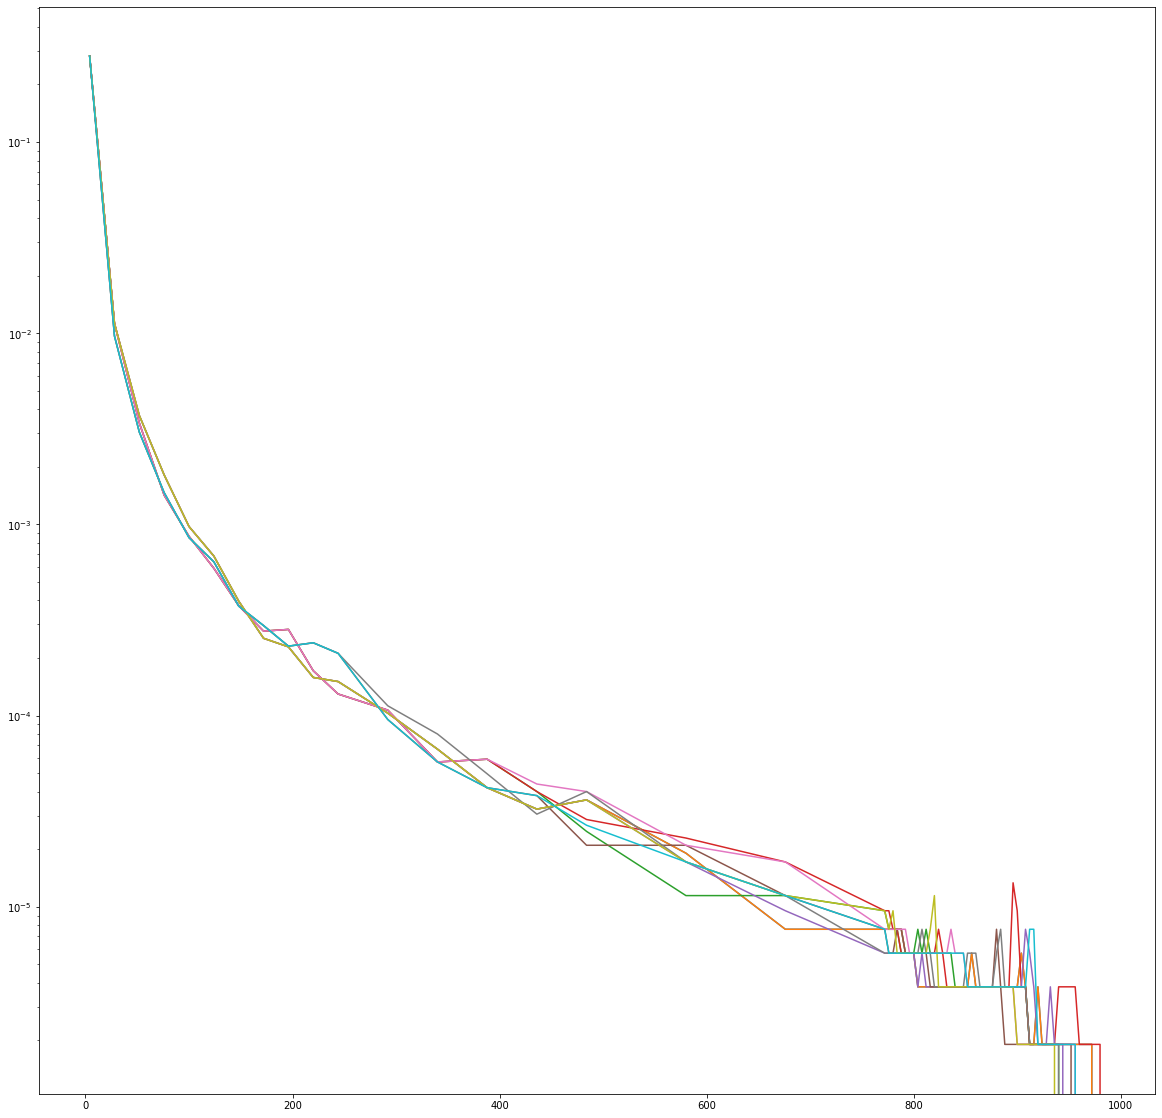

In [18]:
plt.figure(figsize=(20,20))
plt.yscale("log")
for tup in data:
    plt.plot(tup[0],tup[1])
plt.show()

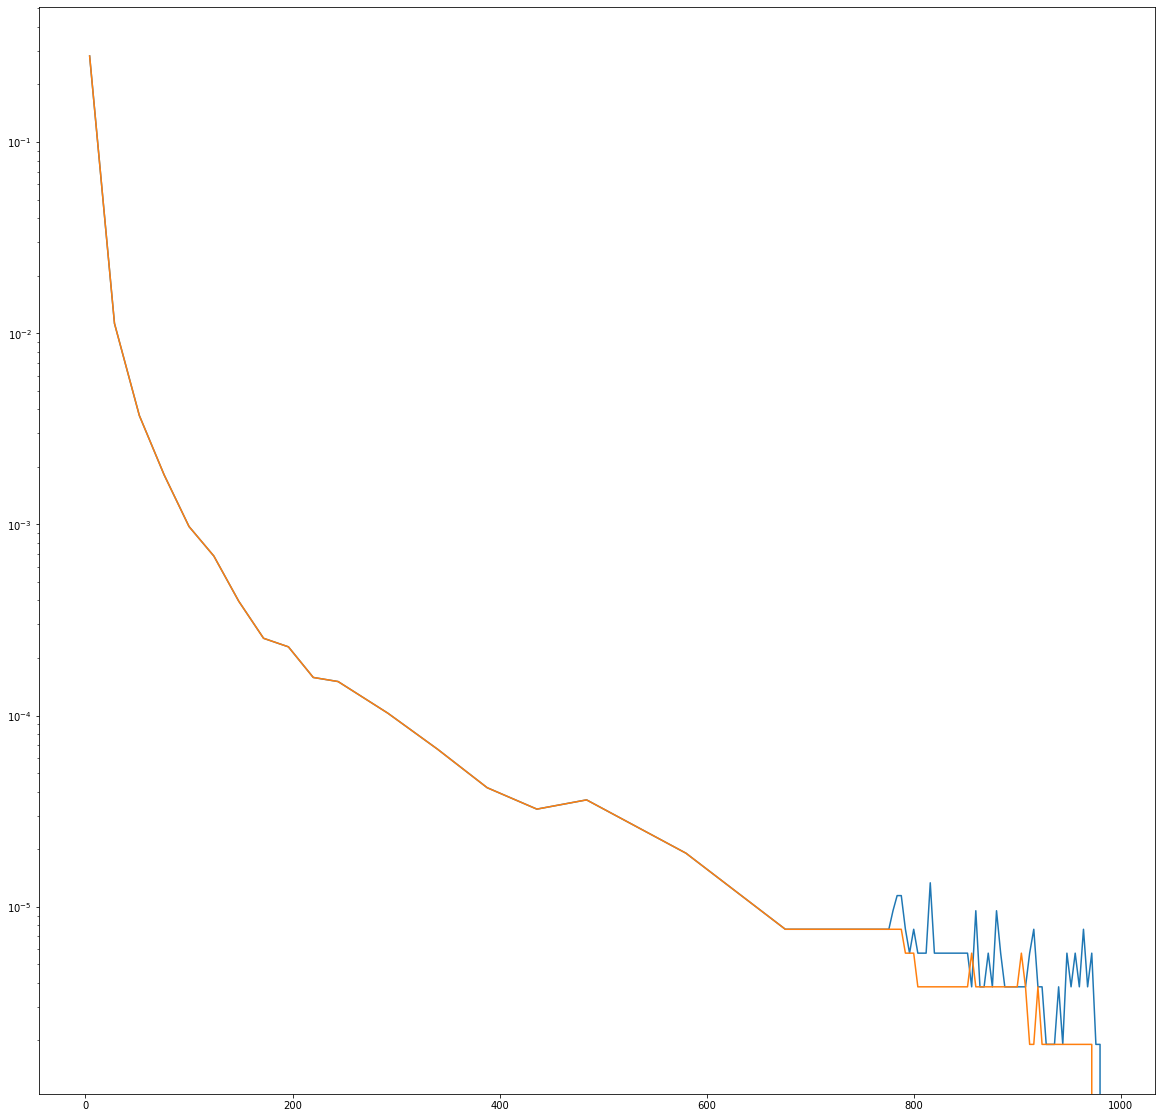

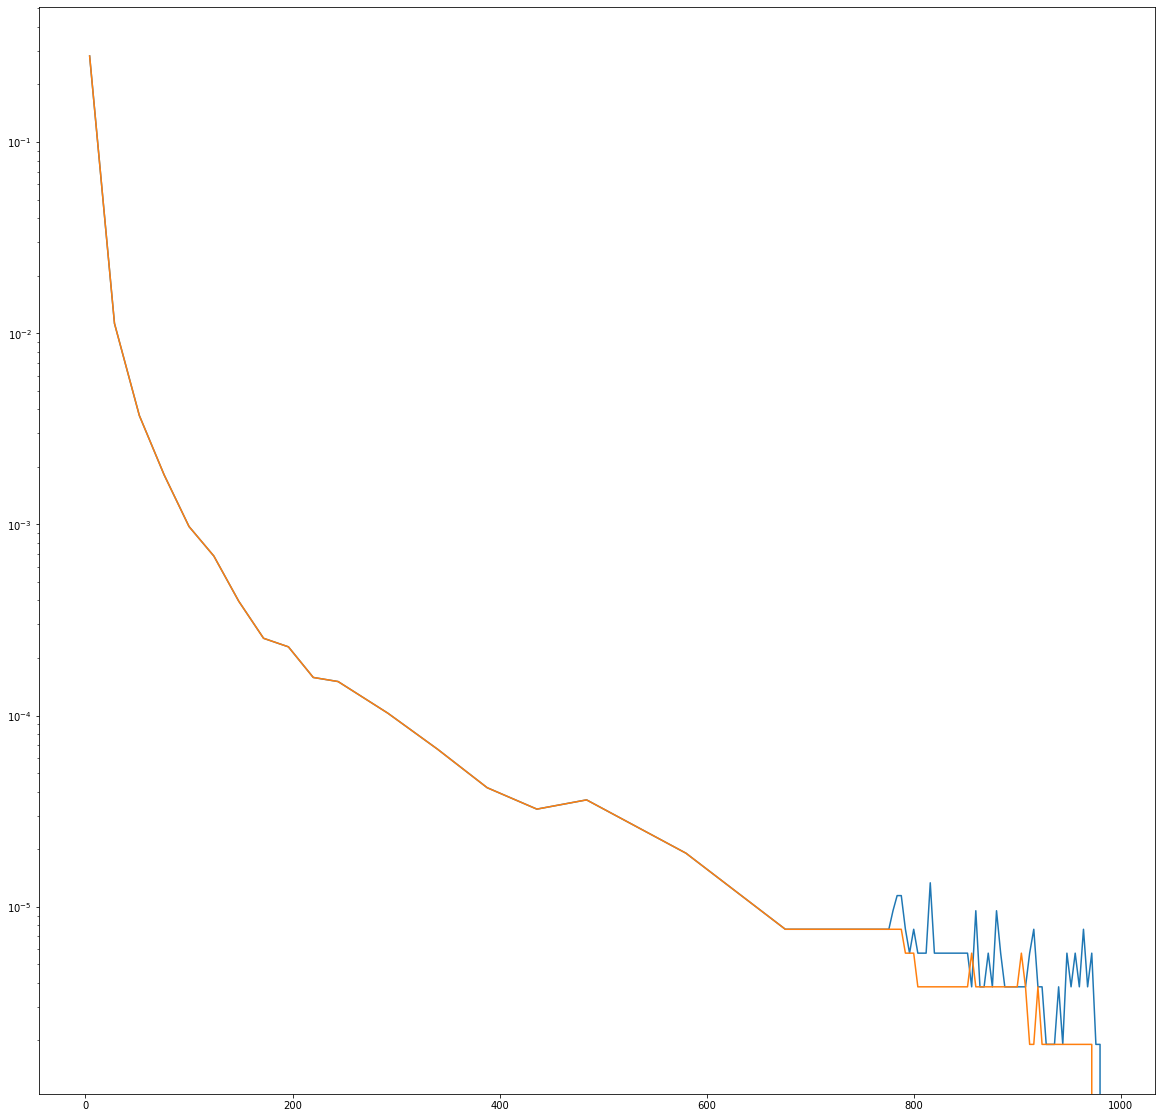

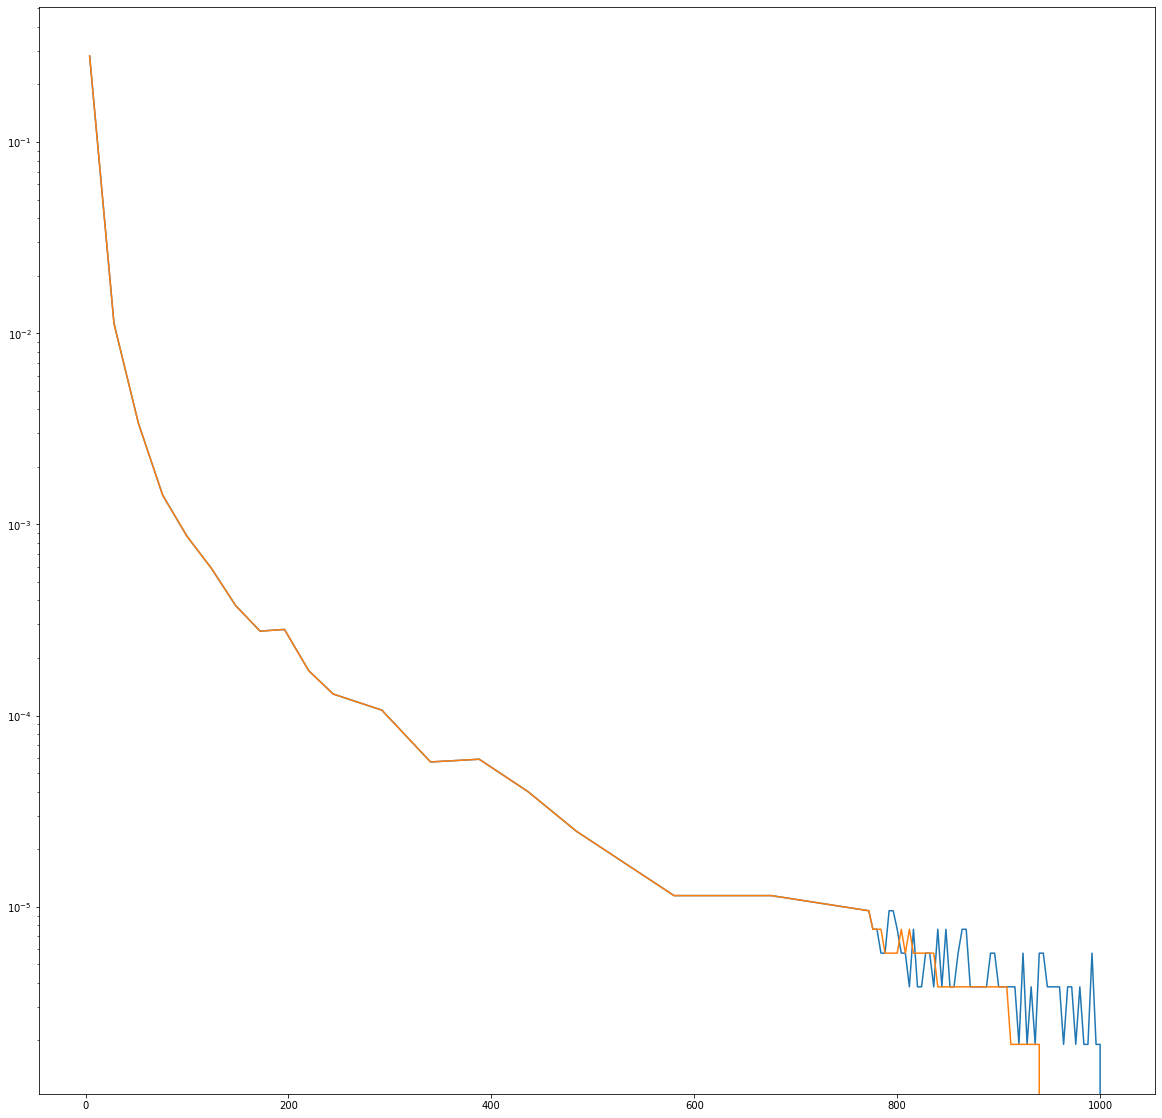

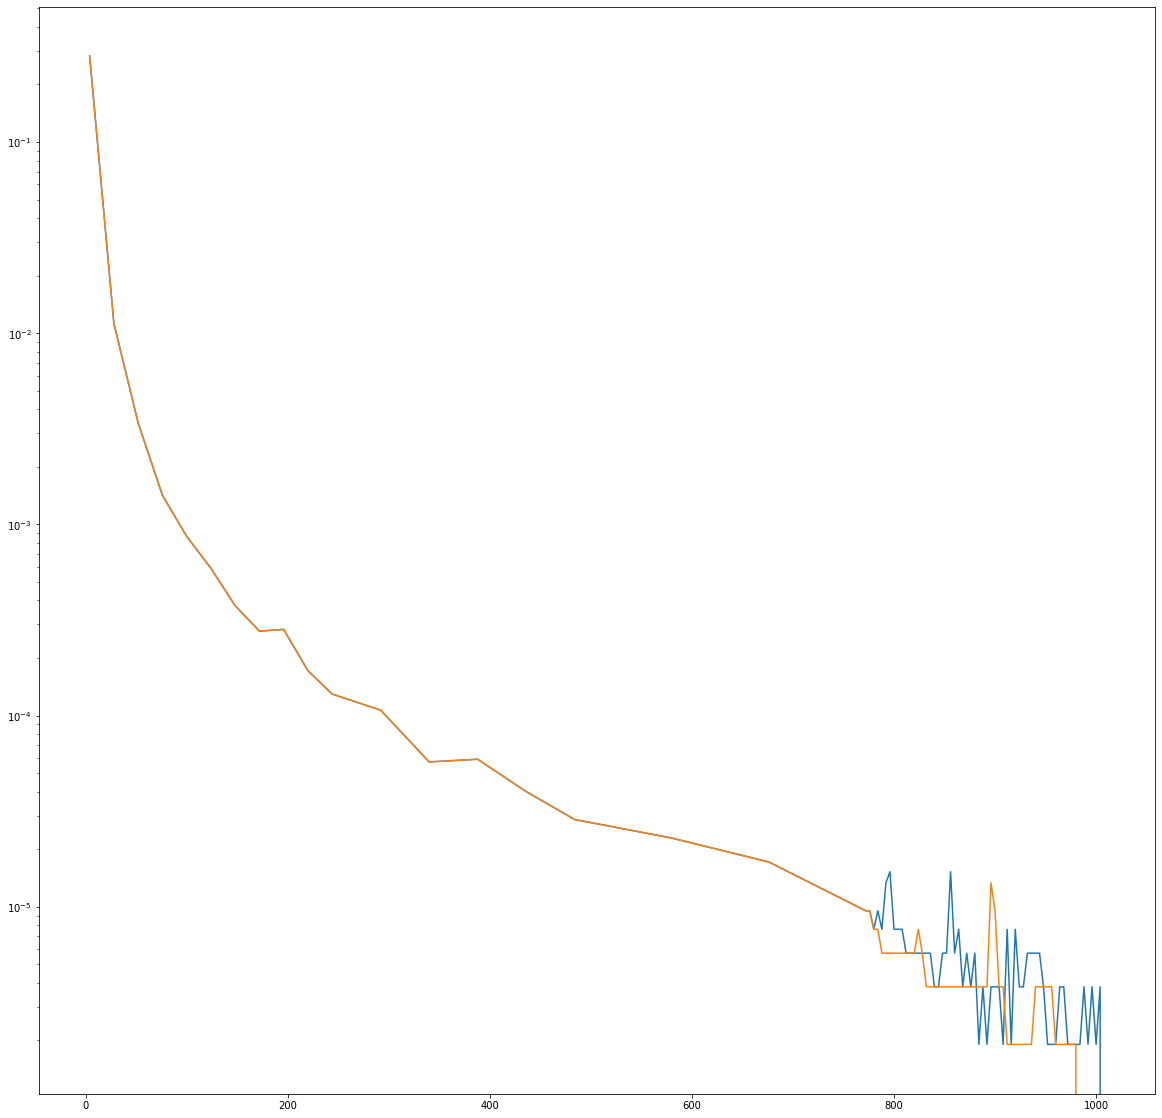

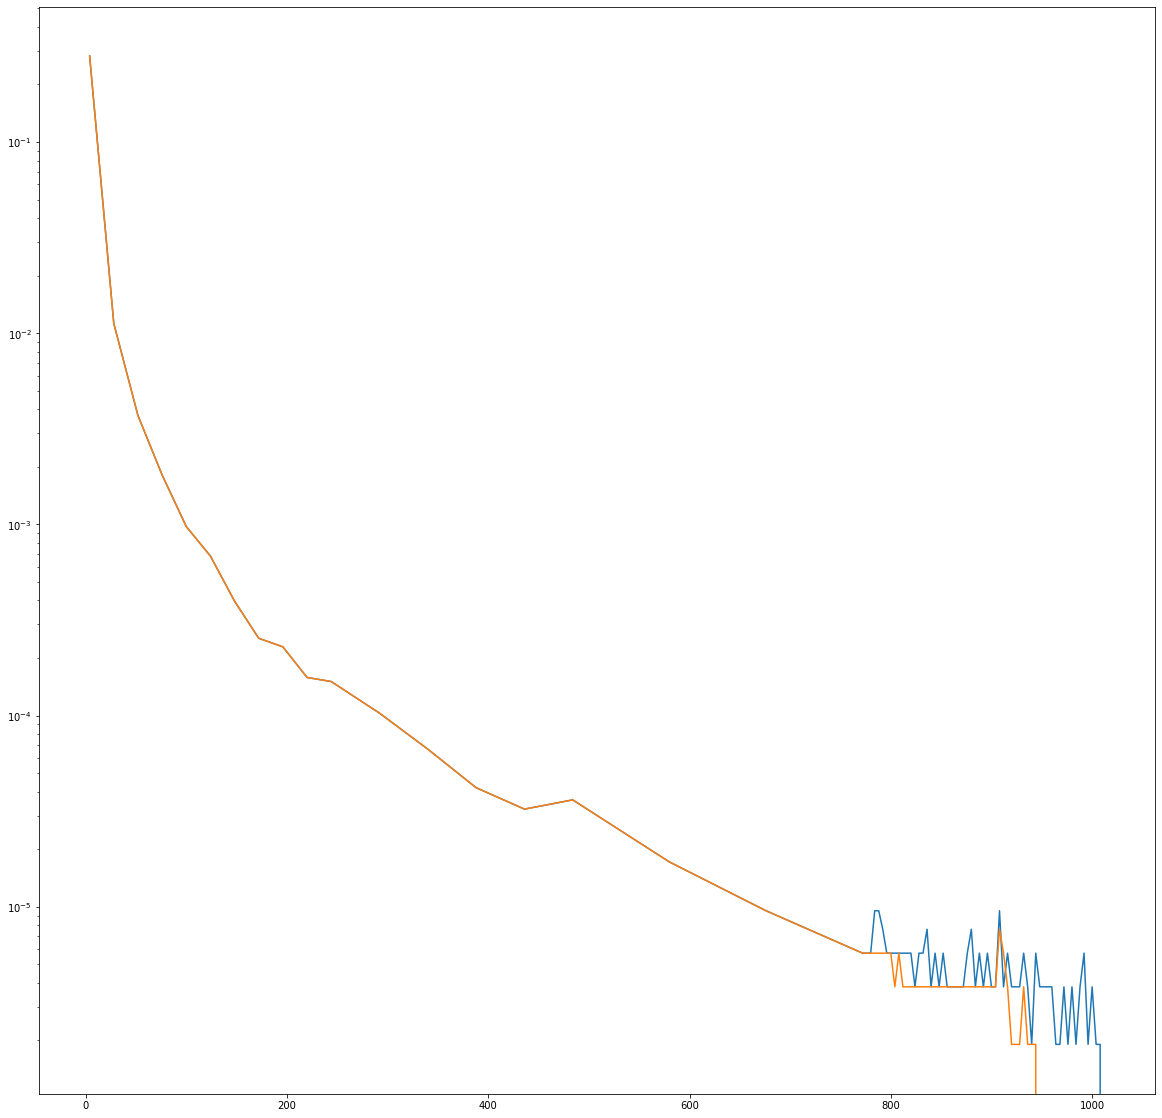

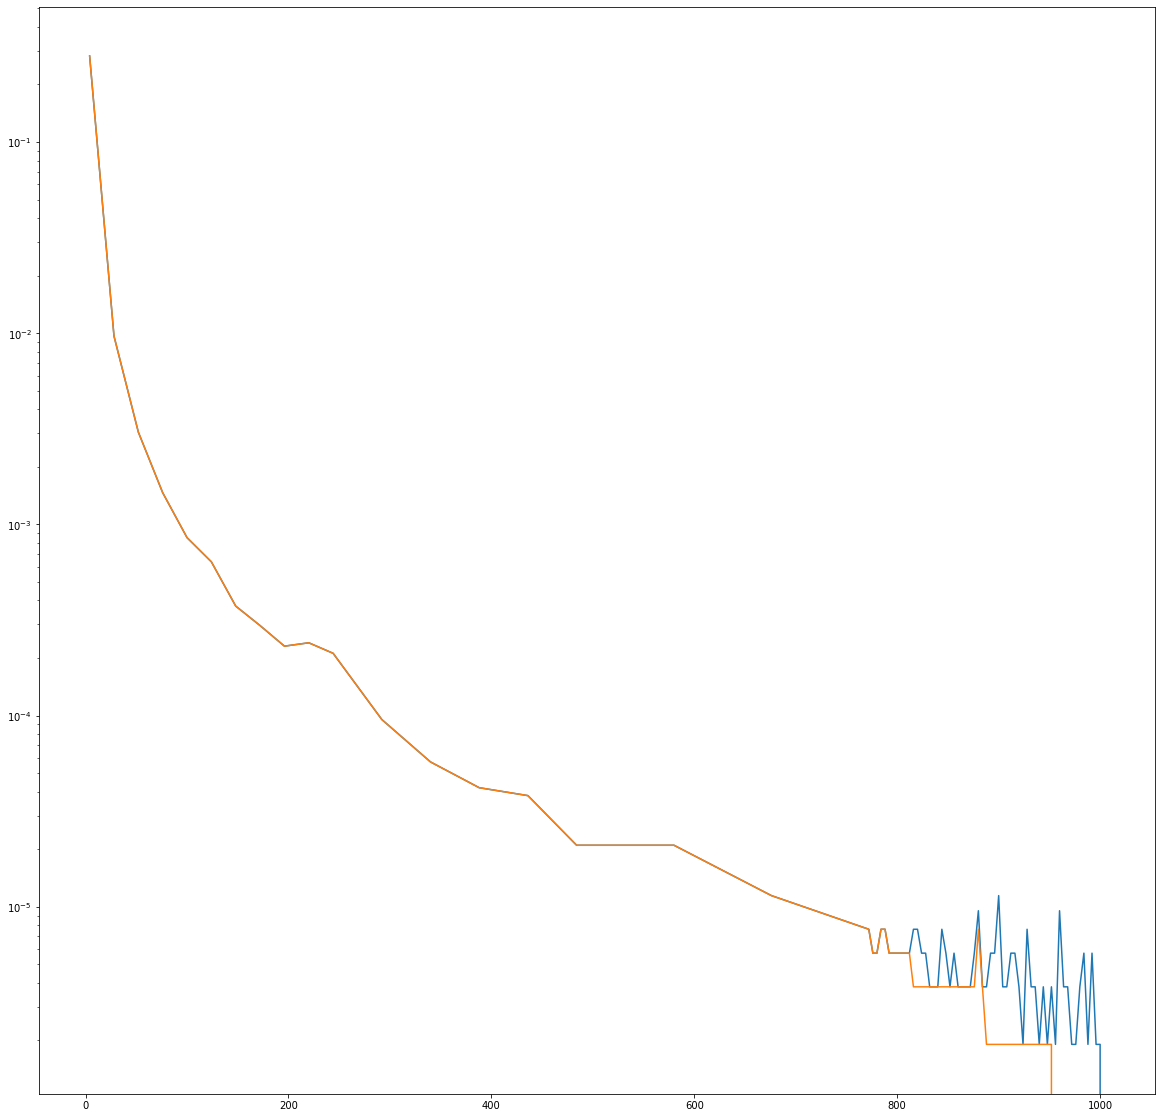

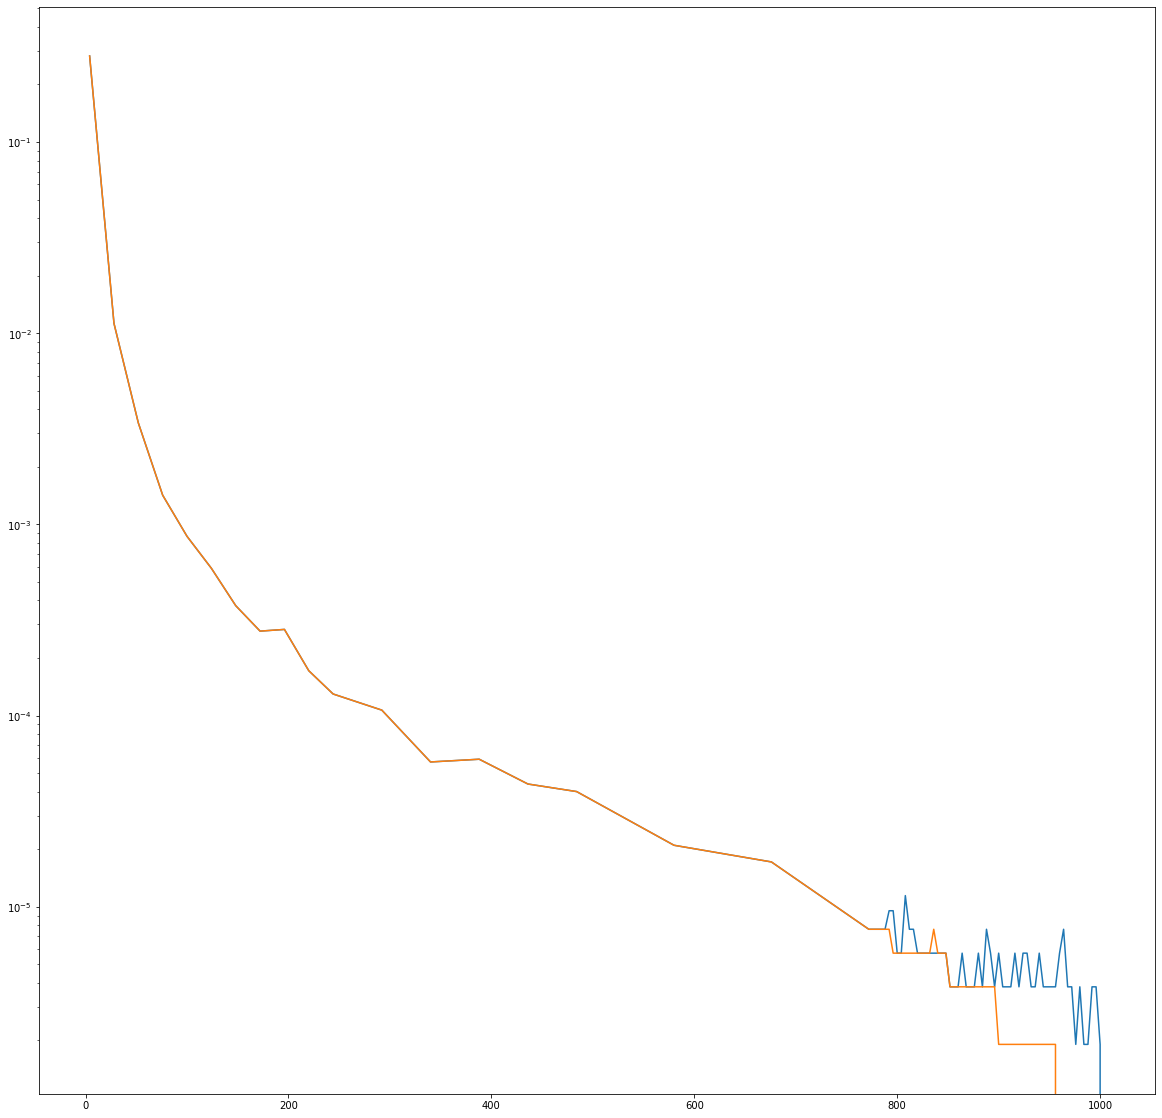

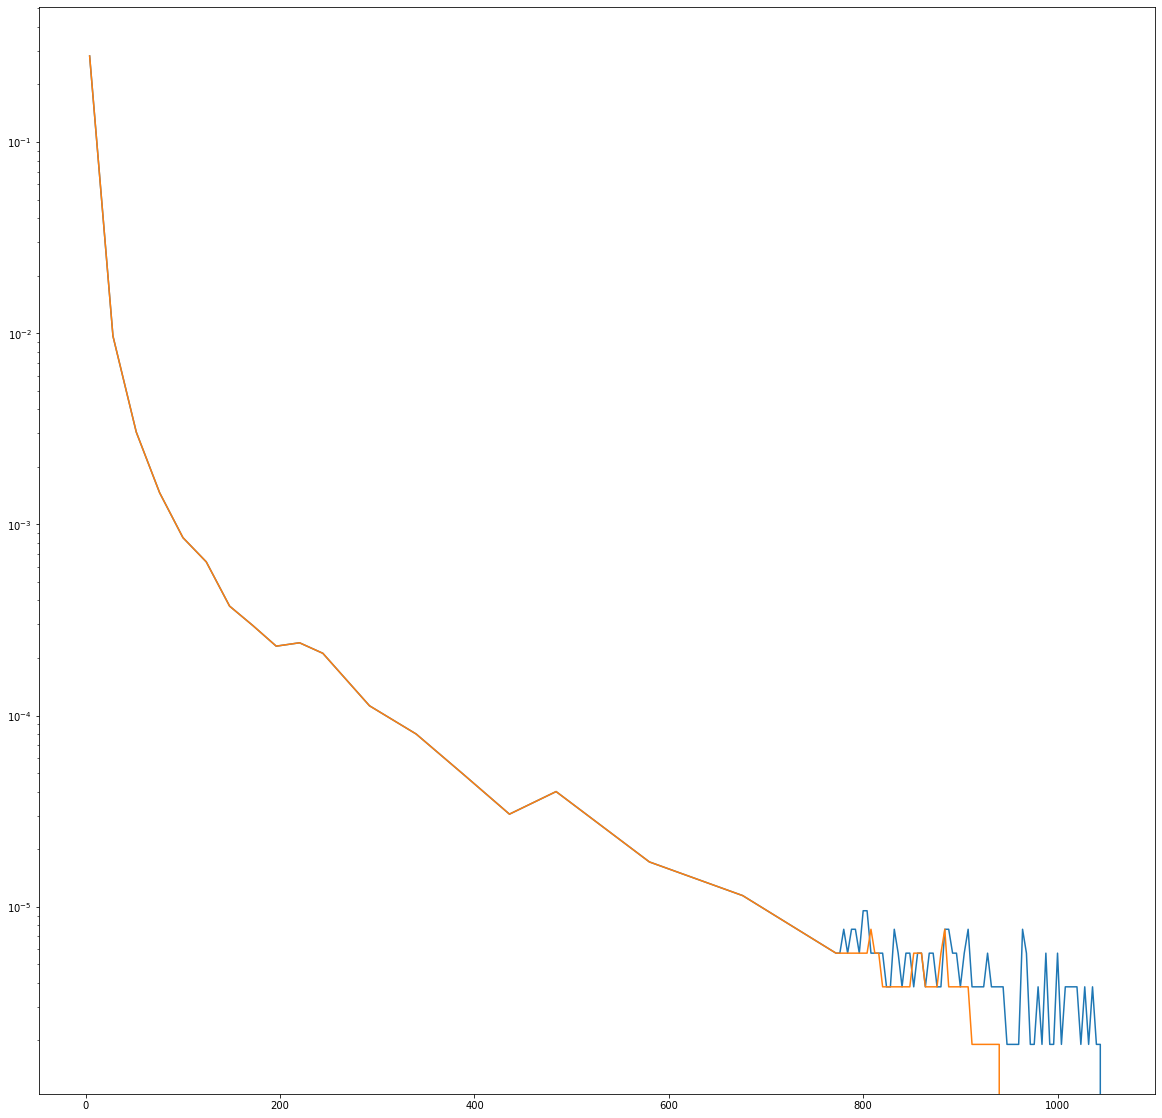

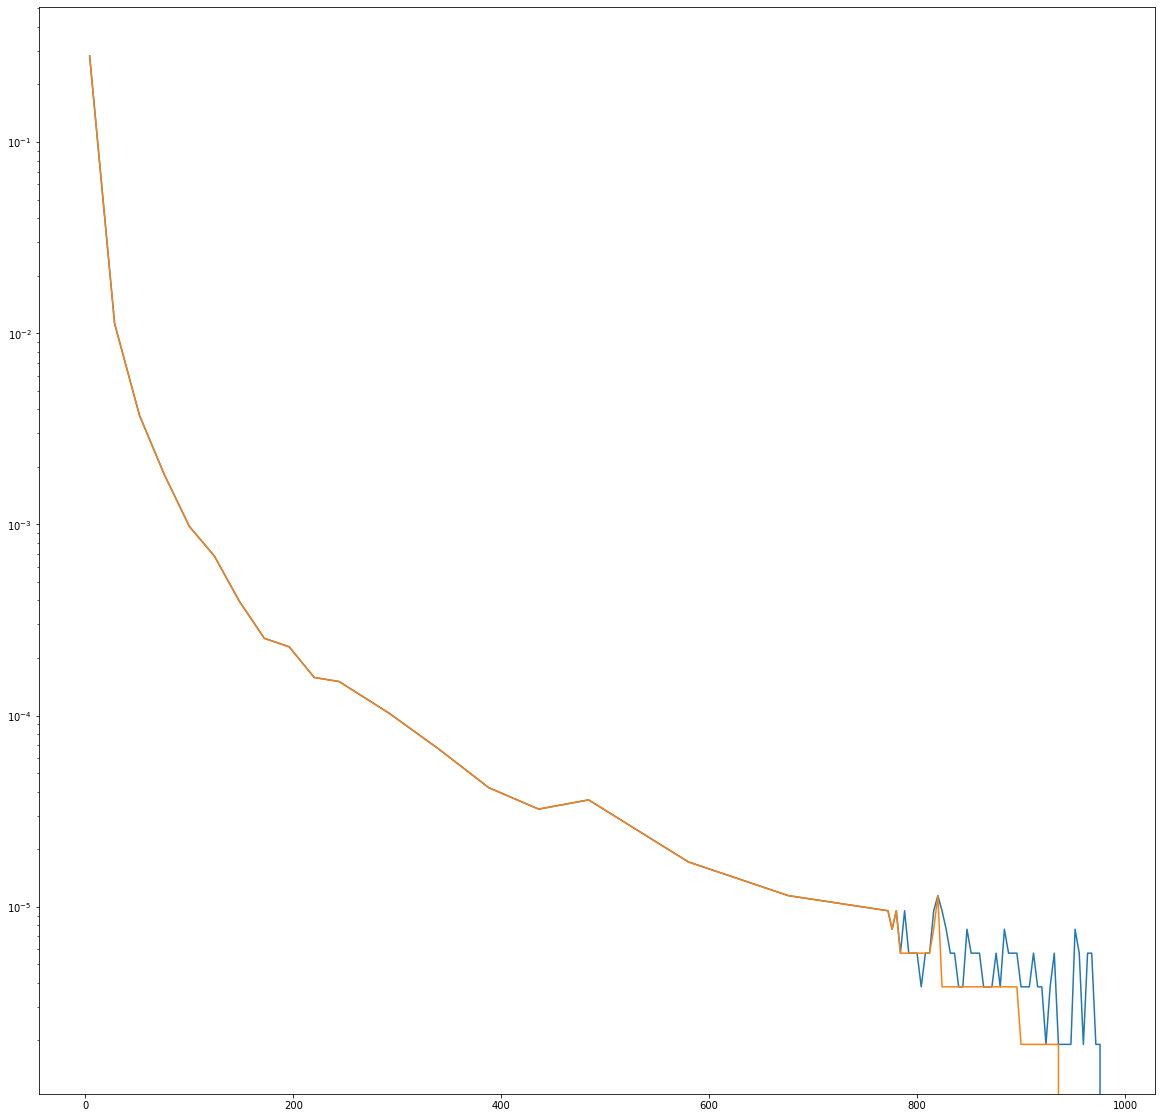

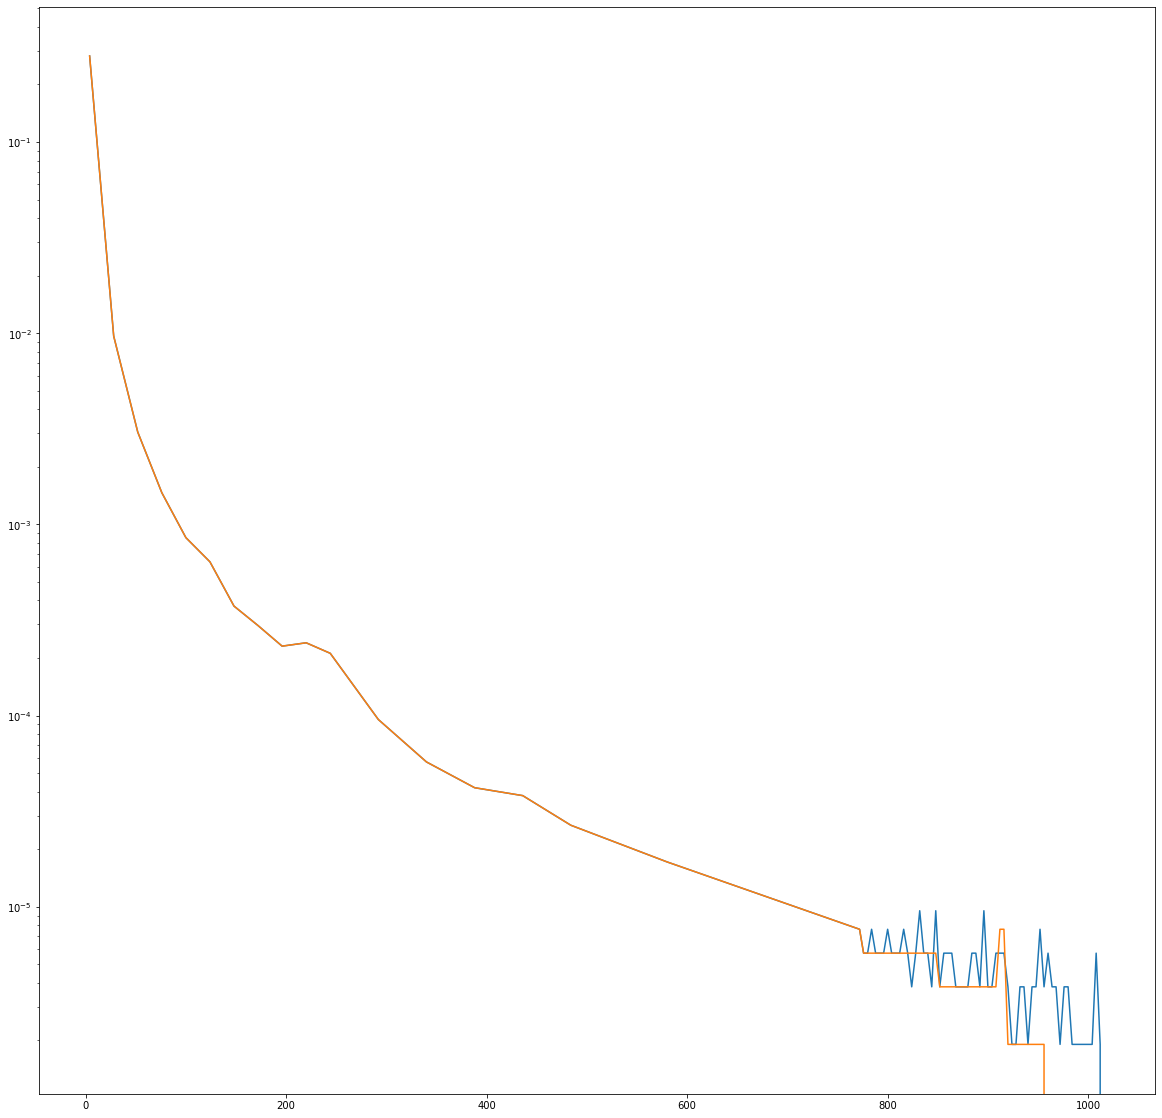

In [26]:
# plt.figure(figsize=(20,20))
# plt.yscale("log")
for i in range(10): 
    plt.figure(figsize=(20,20))
    plt.yscale("log")
    for tup in [data2[i],data[i]]:
        plt.plot(tup[0],tup[1])
    plt.show()

In [4]:
import os

# Open input file
with open('testing_g20_check_0.log', 'r') as input_file:
    # Read the entire file
    input_text = input_file.read()
    # Split the text at "@@"
    file_contents = input_text.split('@@')
    # Remove leading/trailing whitespace from each section
    file_contents = [content.strip() for content in file_contents]
    
    # Create a directory to store the output files
    if not os.path.exists('output'):
        os.makedirs('output')
    
    # Write each section to a separate file in the output directory
    for i, content in enumerate(file_contents):
        filename = os.path.join('output', f'file_{i}.txt')
        with open(filename, 'w') as output_file:
            output_file.write(content)